In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
from definitions import ROOT_DIR

In [2]:
def load_csv_data(data_path, sub_sample=False):
    """
    This function loads the data and returns the respectinve numpy arrays.
    Remember to put the 3 files in the same folder and to not change the names of the files.

    Args:
        data_path (str): datafolder path
        sub_sample (bool, optional): If True the data will be subsempled. Default to False.

    Returns:
        x_train (np.array): training data
        x_test (np.array): test data
        y_train (np.array): labels for training data in format (-1,1)
        train_ids (np.array): ids of training data
        test_ids (np.array): ids of test data
    """
    y_train = np.genfromtxt(
        os.path.join(data_path, "y_train.csv"),
        delimiter=",",
        skip_header=1,
        dtype=int,
        usecols=1,
    )
    print('ytrain done')
    x_train = np.genfromtxt(
        os.path.join(data_path, "x_train.csv"), delimiter=",", skip_header=1
    )
    print('xtrain done')
    x_test = np.genfromtxt(
        os.path.join(data_path, "x_test.csv"), delimiter=",", skip_header=1
    )
    print('xtest done')

    train_ids = x_train[:, 0].astype(dtype=int)
    test_ids = x_test[:, 0].astype(dtype=int)
    x_train = x_train[:, 1:]
    x_test = x_test[:, 1:]

    # sub-sample
    if sub_sample:
        y_train = y_train[::50]
        x_train = x_train[::50]
        train_ids = train_ids[::50]

    return x_train, x_test, y_train, train_ids, test_ids

In [3]:
x_tr, x_te, y_tr, tr_ids, te_ids = load_csv_data('dataset_to_release', True)

ytrain done
xtrain done
xtest done


In [12]:
print(x_tr.shape)

(6563, 321)


In [4]:
data_mapping = {
    "_AIDTST3": ["categorical", 330],
    "_PNEUMO2": ["categorical", 329],
    "_FLSHOT6": ["categorical", 328],
    "_RFSEAT3": ["categorical", 327],
    "_RFSEAT2": ["categorical", 326],
    "_LMTSCL1": ["categorical", 325],
    "_LMTWRK1": ["categorical", 324],
    "_LMTACT1": ["categorical", 323],
    "_PASTAE1": ["categorical", 322],
    "_PAREC1": ["categorical", 321],
    "_PASTRNG": ["categorical", 320],
    "_PA30021": ["categorical", 319],
    "_PA300R2": ["categorical", 318],
    "_PA150R2": ["categorical", 317],
    "_PAINDX1": ["categorical", 316],
    "_PACAT1": ["categorical", 315],
    "PA1VIGM_": ["categorical", 314],
    "PAVIG21_": ["categorical", 313],
    "PAVIG11_": ["categorical", 312],
    "PA1MIN_": ["categorical", 311],
    "PAMIN21_": ["categorical", 310],
    "PAMIN11_": ["categorical", 309],
    "PAMISS1_": ["categorical", 308],
    "STRFREQ_": ["continuous", 307],
    "_MINAC21": ["categorical", 306],
    "_MINAC11": ["categorical", 305],
    "PAFREQ2_": ["continuous", 304],
    "PAFREQ1_": ["continuous", 303],
    "PADUR2_": ["categorical", 302],
    "PADUR1_": ["categorical", 301],
    "ACTIN21_": ["categorical", 300],
    "ACTIN11_": ["categorical", 299],
    "FC60_": ["continuous", 298],
    "MAXVO2_": ["continuous", 297],
    "METVL21_": ["continuous", 296],
    "METVL11_": ["continuous", 295],
    "_TOTINDA": ["categorical", 294],
    "_VEGETEX": ["categorical", 293],
    "_FRUITEX": ["categorical", 292],
    "_VEG23": ["categorical", 291],
    "_FRT16": ["categorical", 290],
    "_VEGLT1": ["categorical", 289],
    "_FRTLT1": ["categorical", 288],
    "_VEGESUM": ["continuous", 287],
    "_FRUTSUM": ["continuous", 286],
    "_VEGRESP": ["categorical", 285],
    "_FRTRESP": ["categorical", 284],
    "_MISVEGN": ["categorical", 283],
    "_MISFRTN": ["categorical", 282],
    "VEGEDA1_": ["continuous", 281],
    "ORNGDAY_": ["continuous", 280],
    "GRENDAY_": ["continuous", 279],
    "BEANDAY_": ["continuous", 278],
    "FRUTDA1_": ["continuous", 277],
    "FTJUDA1_": ["continuous", 276],
    "_RFDRHV5": ["categorical", 275],
    "_DRNKWEK": ["continuous", 274],
    "_RFBING5": ["categorical", 273],
    "DROCDY3_": ["categorical", 272],
    "DRNKANY5": ["categorical", 271],
    "_RFSMOK3": ["categorical", 270],
    "_SMOKER3": ["categorical", 269],
    "_INCOMG": ["categorical", 268],
    "_EDUCAG": ["categorical", 267],
    "_CHLDCNT": ["categorical", 266],
    "_RFBMI5": ["categorical", 265],
    "_BMI5CAT": ["categorical", 264],
    "_BMI5": ["continuous", 263],
    "WTKG3": ["continuous", 262],
    "HTM4": ["continuous", 261],
    "HTIN4": ["categorical", 260],
    "_AGE_G": ["categorical", 259],
    "_AGE80": ["categorical", 258],
    "_AGE65YR": ["categorical", 257],
    "_AGEG5YR": ["categorical", 256],
    "_RACE_G1": ["categorical", 255],
    "_RACEGR3": ["categorical", 254],
    "_RACEG21": ["categorical", 253],
    "_RACE": ["categorical", 252],
    "_HISPANC": ["categorical", 251],
    "_MRACE1": ["categorical", 250],
    "_PRACE1": ["categorical", 249],
    "_DRDXAR1": ["categorical", 248],
    "_ASTHMS1": ["categorical", 247],
    "_CASTHM1": ["categorical", 246],
    "_LTASTH1": ["categorical", 245],
    "_RFCHOL": ["categorical", 243],
    "_CHOLCHK": ["categorical", 242],
    "_RFHYPE5": ["categorical", 241],
    "_HCVU651": ["categorical", 240],
    "_RFHLTH": ["categorical", 239],
    "_LLCPWT": ["delete", 238],
    "_DUALCOR": ["delete", 237],
    "_DUALUSE": ["categorical", 236],
    "_CLLCPWT": ["delete", 235],
    "_CPRACE": ["categorical", 234],
    "_CRACE1": ["categorical", 233],
    "_CHISPNC": ["categorical", 232],
    "_WT2RAKE": ["delete", 231],
    "_RAWRAKE": ["delete", 230],
    "_STRWT": ["delete", 229],
    "_STSTR": ["delete", 228],
    "MSCODE": ["categorical", 227],
    "EXACTOT2": ["delete", 226],
    "EXACTOT1": ["delete", 225],
    "QSTLANG": ["categorical", 224],
    "QSTVER": ["categorical", 223],
    "ADANXEV": ["categorical", 222],
    "MISTMNT": ["categorical", 221],
    "ADMOVE": ["categorical", 220],
    "ADTHINK": ["categorical", 219],
    "ADFAIL": ["categorical", 218],
    "ADEAT1": ["categorical", 217],
    "ADENERGY": ["categorical", 216],
    "ADSLEEP": ["categorical", 215],
    "ADDOWN": ["categorical", 214],
    "ADPLEASR": ["categorical", 213],
    "LSATISFY": ["categorical", 212],
    "EMTSUPRT": ["categorical", 211],
    "CASTHNO2": ["categorical", 210],
    "CASTHDX2": ["categorical", 209],
    "RCSRLTN2": ["categorical", 208],
    "RCSGENDR": ["categorical", 207],
    "TRNSGNDR": ["categorical", 206],
    "SXORIENT": ["categorical", 205],
    "SCNTLWK1": ["categorical", 204],
    "SCNTLPAD": ["categorical", 203],
    "SCNTWRK1": ["categorical", 202],
    "SCNTPAID": ["categorical", 201],
    "SCNTMEL1": ["categorical", 200],
    "SCNTMNY1": ["categorical", 199],
    "PCDMDECN": ["categorical", 198],
    "PCPSADE1": ["categorical", 197],
    "PCPSARS1": ["categorical", 196],
    "PSATIME": ["categorical", 195],
    "PSATEST1": ["categorical", 194],
    "PCPSARE1": ["categorical", 193],
    "PCPSADI1": ["categorical", 192],
    "PCPSAAD2": ["categorical", 191],
    "LASTSIG3": ["categorical", 190],
    "HADSGCO1": ["categorical", 189],
    "HADSIGM3": ["categorical", 188],
    "LSTBLDS3": ["categorical", 187],
    "BLDSTOOL": ["categorical", 186],
    "LENGEXAM": ["categorical", 185],
    "PROFEXAM": ["categorical", 184],
    "HADHYST2": ["categorical", 183],
    "HPLSTTST": ["categorical", 182],
    "HPVTEST": ["categorical", 181],
    "LASTPAP2": ["categorical", 180],
    "HADPAP2": ["categorical", 179],
    "HOWLONG": ["categorical", 178],
    "HADMAM": ["categorical", 177],
    "SHINGLE2": ["categorical", 176],
    "HPVADSHT": ["categorical", 175],
    "HPVADVC2": ["categorical", 174],
    "TETANUS": ["categorical", 173],
    "ARTHEDU": ["categorical", 172],
    "ARTHEXER": ["categorical", 171],
    "ARTHWGT": ["categorical", 170],
    "ARTTODAY": ["categorical", 169],
    "RDUCSTRK": ["categorical", 168],
    "RDUCHART": ["categorical", 167],
    "RLIVPAIN": ["categorical", 166],
    "ASPUNSAF": ["categorical", 165],
    "CVDASPRN": ["categorical", 164],
    "STREHAB1": ["categorical", 163],
    "HAREHAB1": ["categorical", 162],
    "ASINHALR": ["categorical", 161],
    "ASTHMED3": ["categorical", 160],
    "ASNOSLEP": ["categorical", 159],
    "ASYMPTOM": ["categorical", 158],
    "ASACTLIM": ["categorical", 157],
    "ASRCHKUP": ["categorical", 156],
    "ASDRVIST": ["categorical", 155],
    "ASERVIST": ["categorical", 154],
    "ASATTACK": ["categorical", 153],
    "ASTHMAGE": ["categorical", 152],
    "DRADVISE": ["categorical", 151],
    "LONGWTCH": ["categorical", 150],
    "WTCHSALT": ["categorical", 149],
    "CDDISCUS": ["categorical", 148],
    "CDSOCIAL": ["categorical", 147],
    "CDHELP": ["categorical", 146],
    "CDASSIST": ["categorical", 145],
    "CDHOUSE": ["categorical", 144],
    "CIMEMLOS": ["categorical", 143],
    "VIMACDG2": ["categorical", 142],
    "VIGLUMA2": ["categorical", 141],
    "VICTRCT4": ["categorical", 140],
    "VIINSUR2": ["categorical", 139],
    "VIEYEXM2": ["categorical", 138],
    "VINOCRE2": ["categorical", 137],
    "VIPRFVS2": ["categorical", 136],
    "VIREDIF3": ["categorical", 135],
    "VIDFCLT2": ["categorical", 134],
    "CRGVEXPT": ["categorical", 133],
    "CRGVMST2": ["categorical", 132],
    "CRGVHOUS": ["categorical", 131],
    "CRGVPERS": ["categorical", 130],
    "CRGVPRB1": ["categorical", 129],
    "CRGVHRS1": ["categorical", 128],
    "CRGVLNG1": ["categorical", 127],
    "CRGVREL1": ["categorical", 126],
    "CAREGIV1": ["categorical", 125],
    "QLHLTH2": ["delete", 124],
    "QLSTRES2": ["delete", 123],
    "QLMENTL2": ["delete", 122],
    "PAINACT2": ["delete", 121],
    "DIABEDU": ["categorical", 120],
    "DIABEYE": ["categorical", 119],
    "EYEEXAM": ["categorical", 118],
    "FEETCHK": ["categorical", 117],
    "CHKHEMO3": ["categorical", 116],
    "DOCTDIAB": ["categorical", 115],
    "FEETCHK2": ["categorical", 114],
    "BLDSUGAR": ["categorical", 113],
    "INSULIN": ["categorical", 112],
    "PREDIAB1": ["categorical", 111],
    "PDIABTST": ["categorical", 110],
    "WHRTST10": ["categorical", 109],
    "HIVTSTD3": ["categorical", 108],
    "HIVTST6": ["categorical", 107],
    "PNEUVAC3": ["categorical", 106],
    "IMFVPLAC": ["categorical", 105],
    "FLSHTMY2": ["categorical", 104],
    "FLUSHOT6": ["categorical", 103],
    "SEATBELT": ["delete", 102],
    "JOINPAIN": ["categorical", 101],
    "ARTHSOCL": ["categorical", 100],
    "ARTHDIS2": ["categorical", 99],
    "LMTJOIN3": ["categorical", 98],
    "STRENGTH": ["categorical", 97],
    "EXERHMM2": ["categorical", 96],
    "EXEROFT2": ["categorical", 95],
    "EXRACT21": ["categorical", 94],
    "EXERHMM1": ["categorical", 92],
    "EXEROFT1": ["categorical", 91],
    "EXRACT11": ["categorical", 90],
    "EXERANY2": ["categorical", 89],
    "VEGETAB1": ["categorical", 88],
    "FVORANG": ["categorical", 87],
    "FVGREEN": ["categorical", 86],
    "FVBEANS": ["categorical", 85],
    "FRUIT1": ["categorical", 84],
    "FRUITJU1": ["categorical", 83],
    "MAXDRNKS": ["categorical", 82],
    "DRNK3GE5": ["categorical", 81],
    "AVEDRNK2": ["categorical", 80],
    "ALCDAY5": ["categorical", 79],
    "USENOW3": ["categorical", 78],
    "LASTSMK2": ["categorical", 77],
    "STOPSMK2": ["categorical", 76],
    "SMOKDAY2": ["categorical", 75],
    "SMOKE100": ["categorical", 74],
    "DIFFALON": ["categorical", 73],
    "DIFFDRES": ["categorical", 72],
    "DIFFWALK": ["categorical", 71],
    "DECIDE": ["categorical", 70],
    "BLIND": ["categorical", 69],
    "USEEQUIP": ["categorical", 68],
    "QLACTLM2": ["categorical", 67],
    "PREGNANT": ["categorical", 66],
    "HEIGHT3": ["delete", 65],
    "WEIGHT2": ["delete", 64],
    "INTERNET": ["categorical", 63],
    "INCOME2": ["categorical", 62],
    "CHILDREN": ["categorical", 61],
    "EMPLOY1": ["categorical", 60],
    "VETERAN3": ["categorical", 59],
    "CPDEMO1": ["categorical", 58],
    "NUMPHON2": ["delete", 57],
    "NUMHHOL2": ["delete", 56],
    "RENTHOM1": ["delete", 55],
    "EDUCA": ["categorical", 54],
    "MARITAL": ["categorical", 53],
    "SEX": ["categorical", 52],
    "DIABAGE2": ["categorical", 51],
    "DIABETE3": ["categorical", 50],
    "CHCKIDNY": ["categorical", 49],
    "ADDEPEV2": ["categorical", 48],
    "HAVARTH3": ["categorical", 47],
    "CHCCOPD1": ["categorical", 46],
    "CHCOCNCR": ["categorical", 45],
    "CHCSCNCR": ["categorical", 44],
    "ASTHNOW": ["categorical", 43],
    "ASTHMA3": ["categorical", 42],
    "CVDSTRK3": ["categorical", 41],
    "TOLDHI2": ["categorical", 38],
    "CHOLCHK": ["categorical", 37],
    "BLOODCHO": ["categorical", 36],
    "BPMEDS": ["categorical", 35],
    "BPHIGH4": ["categorical", 34],
    "CHECKUP1": ["categorical", 33],
    "MEDCOST": ["categorical", 32],
    "PERSDOC2": ["categorical", 31],
    "HLTHPLN1": ["categorical", 30],
    "POORHLTH": ["categorical", 29],
    "MENTHLTH": ["categorical", 28],
    "PHYSHLTH": ["categorical", 27],
    "GENHLTH": ["categorical", 26],
    "HHADULT": ["categorical", 25],
    "LANDLINE": ["delete", 24],
    "CSTATE": ["categorical", 23],
    "CCLGHOUS": ["delete", 22],
    "PVTRESD2": ["categorical", 21],
    "CADULT": ["delete", 20],
    "CELLFON2": ["delete", 19],
    "CTELNUM1": ["delete", 18],
    "NUMWOMEN": ["categorical", 17],
    "NUMMEN": ["categorical", 16],
    "NUMADULT": ["categorical", 15],
    "LADULT": ["delete", 14],
    "CELLFON3": ["delete", 13],
    "STATERES": ["delete", 12],
    "COLGHOUS": ["delete", 11],
    "PVTRESD1": ["categorical", 10],
    "CTELENUM": ["delete", 9],
    "_PSU": ["delete", 8],
    "SEQNO": ["delete", 7],
    "DISPCODE": ["delete", 6],
    "IYEAR": ["categorical", 5],
    "IDAY": ["delete", 4],
    "IMONTH": ["categorical", 3],
    "IDATE": ["delete", 2],
    "FMONTH": ["delete", 1],
    "_STATE": ["categorical", 0]
}

In [7]:
def get_type_features(data, type_):
    """
    This function returns the data with the selected features type 

    Args:
        data (np.ndarray): data
        type_ (string): type of the data, either 'continuous' or 'categorical'

    Returns:
        continuous_data or categorical_data (np.array): new data containing only the old data with the correct type
    """

    if type_  != 'continuous' and type_ != 'categorical':
        raise TypeError(f"Type of data must be either categorical or continuous, you wrote {type_}")
    
    indices = [data_mapping[key][1] for key in data_mapping if data_mapping[key][0] == type_]
    type_data = data[:, indices]
    return type_data

In [8]:
categorical = get_type_features(x_tr, 'categorical')
continuous  = get_type_features(x_tr, 'continuous')
print(f'Categorical data is {categorical.shape[1]} features')
print(f'Numerical data is {continuous.shape[1]} features')

IndexError: index 330 is out of bounds for axis 1 with size 321

In [6]:
def remove_nan_columns(data,threshold):
    #remove features with threshold for nan
    nan_ratio = np.sum(np.isnan(data), axis = 0)/ data.shape[0]
    columns_to_remove = np.where(nan_ratio > threshold)[0]
    without_nan = np.delete(data, columns_to_remove, axis = 1)
    return without_nan


In [7]:
nonan = remove_nan_columns(categorical, 0.8)
print(nonan.shape)


(6563, 182)


In [37]:
nan_ratio = np.sum(np.isnan(nonan), axis = 0)/ nonan.shape[0]

In [8]:
def remove_constant_features(data_array, threshold_ratio=0.01):
    """
    Remove constant features from the data array based on a threshold ratio.

    Parameters:
    - data_array: NumPy array containing the data.
    - threshold_ratio: Threshold ratio for standard deviation. Features with
      standard deviation less than or equal to threshold_ratio * max_std will be removed.

    Returns:
    - array_without_constants: NumPy array with constant features removed.
    """
    std_values = np.nanstd(data_array, axis=0)
    max_std = np.nanmax(std_values)
    
    # Identify constant features based on the threshold ratio
    constant_features = np.where(std_values <= threshold_ratio * max_std)[0]

    # Remove constant features
    array_without_constants = np.delete(data_array, constant_features, axis=1)

    return array_without_constants

In [11]:
noconst = remove_constant_features(nonan, 0.00025)
print(noconst.shape)

In [ ]:
def one_hot_encode(array, categorical_indexes):
    encoded_array = array.copy()

    for index in categorical_indexes:
        unique_values = set(row[index] for row in array)
        for value in unique_values:
            new_column = [1 if row[index] == value else 0 for row in array]
            encoded_array = [row + [new_col] for row, new_col in zip(encoded_array, new_column)]

    # Remove the original categorical columns
    encoded_array = [row[:index] + row[index + 1:] for row in encoded_array for index in sorted(categorical_indexes, reverse=True)]

    return encoded_array

In [20]:
def one_hot_encode(array, categorical_indexes):
    encoded_array = array.copy()

    for index in categorical_indexes:
        unique_values = set(row[index] for row in array)
        
        # Handle NaN as a separate category (assign all NaN values to a column of zeros)
        unique_values.discard(np.nan)
        unique_values.add(np.nan)
        
        for value in unique_values:
            # Handle NaN values separately
            if value is np.nan:
                new_column = [0 if np.isnan(row[index]) else 1 for row in array]
            else:
                new_column = [1 if row[index] == value else 0 for row in array]
                
            encoded_array = [row + [new_col] for row, new_col in zip(encoded_array, new_column)]

    # Remove the original categorical columns
    encoded_array = [row[:index] + row[index + 1:] for row in encoded_array for index in sorted(categorical_indexes, reverse=True)]

    return encoded_array

In [61]:
nan_count_tr = np.sum(np.isnan(continuous_data_array_tr))
print(continuous_data_array_tr.shape)

# Get indices of NaN values columns
nan_column_indices = np.where(np.isnan(continuous_data_array_tr).any(axis=0))[0]
print(nan_column_indices.shape)
for n in nan_column_indices:
    print(n)
print(nan_count_tr)

(6563, 19)
(8,)
1
2
4
5
6
8
13
14
13088


In [21]:
def remove_constant_features(data_array, threshold_ratio=0.001):
    #works on numerical
    """
    Remove constant features from the data array based on a threshold ratio.

    Parameters:
    - data_array: NumPy array containing the data.
    - threshold_ratio: Threshold ratio for standard deviation. Features with
      standard deviation less than or equal to threshold_ratio * max_std will be removed.

    Returns:
    - array_without_constants: NumPy array with constant features removed.
    """
    std_values = np.std(data_array, axis=0)
    max_std = np.max(std_values)
    
    # Identify constant features based on the threshold ratio
    constant_features = np.where(std_values <= threshold_ratio * max_std)[0]

    # Remove constant features
    array_without_constants = np.delete(data_array, constant_features, axis=1)

    return array_without_constants

In [106]:
def complete(data):
    """
    This function complete continuous features containing Nan values 

    Args:
        data (np.ndarray): data

    Returns:
        completed_data (np.ndarray): completed data
    """
    #avg add
    completed_data = data.copy()
    column_means = np.nanmean(completed_data, axis=0)

    # Find NaN values in the array
    nan_mask = np.isnan(completed_data)

    # Replace NaN values with the mean of their respective columns
    completed_data[nan_mask] = np.take(column_means, np.where(nan_mask)[1])
    return completed_data

In [75]:
def remove_constant_categorical(arr, threshold=0.001):
    constant_cols = []
    for i in range(arr.shape[1]):

        unique_vals, counts = np.unique(~np.isnan(arr[:, i]), return_counts=True)
        freq = counts.max() / len(arr)
        if freq > 1 - threshold:
            constant_cols.append(i)
    
    arr_filtered = np.delete(arr, constant_cols, axis=1)

    return arr_filtered


In [76]:
print(categorical.shape)
noconst_cat = remove_constant_categorical(categorical)
print(noconst_cat.shape)

(6563, 297)
(6563, 203)


In [116]:
def plot_const_thresholds(data, ratios, filename, visualisation = False):
    #plot how many we are keeping if we remove based on threshold for cat and num
    numerical, _ = data_type(data)
    full_numerical = complete(numerical)
    categorical, _ = data_type(data, 'categorical')
    
    num_left = []
    cat_left = []
    for i in ratios:
        num_left.append(np.shape(remove_constant_features(full_numerical, i))[1])
        cat_left.append(np.shape(remove_constant_categorical(categorical, i))[1])
    
    print(cat_left)
    fig = plt.figure(facecolor = 'white')
    plt.plot(ratios, num_left, color = 'forestgreen', label = 'numerical')
    plt.plot(ratios, cat_left, color = 'deeppink', label = 'categorical')
    plt.title('Remaining features when removing predictors containing values with freq > 1-ratio with various ratios')
    plt.xlabel('Ratio')
    plt.ylabel('Remaining features')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    # Add minor ticks on the y-axis
    plt.minorticks_on()
    plt.gca().yaxis.set_minor_locator(plt.MultipleLocator(1))  # Adjust the interval as needed
    
    
    if visualisation == False:
        plt.close()
    fig_path = os.path.join(ROOT_DIR, 'figures')
    if not os.path.exists(fig_path):
        os.makedirs(fig_path)
    plt.savefig(os.path.join(fig_path, filename))
        
        

In [122]:
def plot_const_thresholds2(data, ratios, filename, visualisation = False):
    #plot how many we are keeping if we remove based on threshold for cat and num
    numerical, _ = data_type(data)
    full_numerical = complete(numerical)
    categorical, _ = data_type(data, 'categorical')
    
    num_left = []
    cat_left = []
    for i in ratios:
        num_left.append(np.shape(remove_constant_features(full_numerical, i))[1])
        cat_left.append(np.shape(remove_constant_categorical(categorical, i))[1])
    
    fig, ax1 = plt.subplots()
    ax1.plot(ratios, num_left, color='royalblue')
    ax1.set_xlabel('Ratio')
    ax1.set_ylabel('Numerical features left', color='royalblue')

    ax2 = ax1.twinx()
    ax2.plot(ratios, cat_left, color='deeppink')
    ax2.set_ylabel('Categorical features left', color='deeppink')

    plt.title('Remaining features when removing predictors containing values with freq > 1-ratio with various ratios')
    plt.grid(True)
    plt.tight_layout()
    
    # Add minor ticks on the y-axis
    ax1.yaxis.set_minor_locator(AutoMinorLocator(n=5))  # Adjust the number of minor ticks as needed 
    ax2.set_yticks(ax1.get_yticks())   
    
    if visualisation == False:
        plt.close()
    fig_path = os.path.join(ROOT_DIR, 'figures')
    if not os.path.exists(fig_path):
        os.makedirs(fig_path)
    plt.savefig(os.path.join(fig_path, filename))
        
        

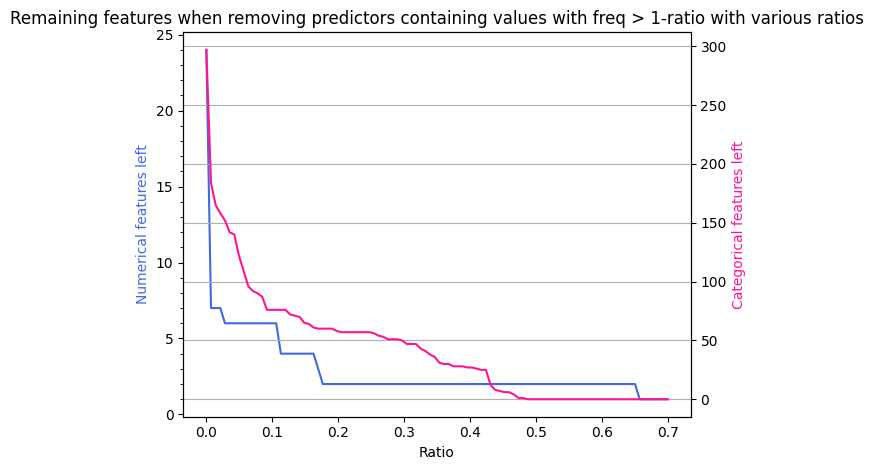

In [123]:
plot_const_thresholds2(x_tr, np.linspace(0,0.7, 100), 'const_elimination_ratios_tr', True)

In [95]:
numerical, _= data_type(x_tr)
print(type(numerical))
print(numerical.shape)
imputed = complete(numerical)
noconsg = remove_constant_features(imputed, 0.001)
print(noconsg.shape)




<class 'numpy.ndarray'>
(6563, 24)
<class 'numpy.ndarray'>
(6563, 15)


In [113]:
categorical,_ = data_type(x_tr, 'categorical')
print(categorical.shape)
noconst = remove_constant_categorical(categorical, 0)
print(noconst.shape)

(6563, 297)
(6563, 297)
